# Splines cúbicos.

## Conjunto de ejercicios

1. Dados los puntos (0,1),(1,5),(2,3), determine el spline cúbico

A continuación realizaremos la gráfica de los puntos para entender su comportamiento

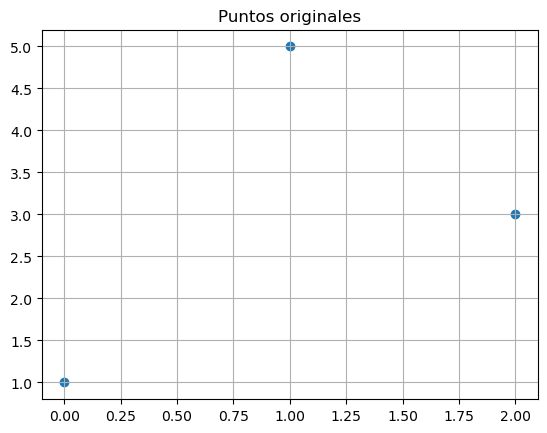

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x_puntos=[0,1,2]
y_puntos=[1,5,3]
plt.scatter(x_puntos,y_puntos)
plt.title('Puntos originales')
plt.grid(True)
plt.show()

A continuación se determinarán los dos spines cúbicos $S_0$ y $S_1$ necesarios para realizar la interpolación de la función

A partir de $S_0$ podemos obtener las siguientes ecuaciones:

* $S_0(x_0)=y_0$
$a_0=1$

* $S_0(x_1)=y_1$
$b_0+c_0+d_0=5$

* $s_0'(x_1)=s_1'(x_1)$
$b_0+2c_0+3d_0=1$

* $s_0''(x_0)=0$
$c_0=0$

A partir de $S_1$ se obtiene:
* $S_1(x_1)=y_1$
$a_1=5$

* $S_1(x_2)=y_2$
$b_1+c_1+d_1=-2$

* $S_1''(x_2)=0$
$c_1=-3d_1$

* $S_1''(x_1)=S_0''(x_1)$
$c_1=c_0+3d_0$

Resolviendo el sistema de ecuaciones:

$a_0=1$

$b_0=\frac{11}{2}$

$c_0=0$

$d_0=-3/2$

$a_1=5$

$b_1=1$

$c_1=-9/2$

$d_1=3/2$

Por lo tanto las funciones para los splines son:

$S_0=1+\frac{11}{2}*x-\frac{3}{2}*x^3$
.
$S_1=5+x-1-\frac{9}{2}*(x-1)^2+\frac{3}{2}*(x-1)^3$


A continuación graficaremos la función resultante junto con los puntos por los que debe pasar.

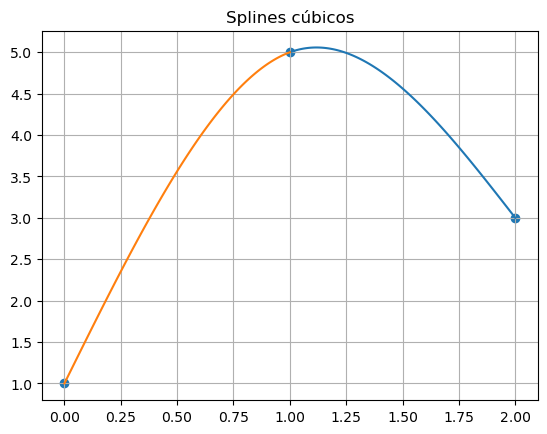

In [13]:
def so(x):
    return 1+ 11/2 * x - 3/2 * (x**3)
def s1(x):
    return 5 + (x-1) - 9/2 * (x-1)**2 + 3/2 * (x-1)**3
plt.scatter(x_puntos,y_puntos)
plt.title('Splines cúbicos')
plt.grid(True)
x_s0=np.linspace(0,1,100)
y_s0=so(x_s0)
x_s1=np.linspace(1,2,100)
y_s1=s1(x_s1)
plt.plot(x_s1,y_s1,label='spline 1')
plt.plot(x_s0,y_s0,label='spline 0')
plt.show()

2. Dados los puntos(-1,1),(1,3),determine el spline cúbico sabiendo que $f'(x_0)=1$,$f'(x_n)=2$

A continuación graficaremos los puntos dados

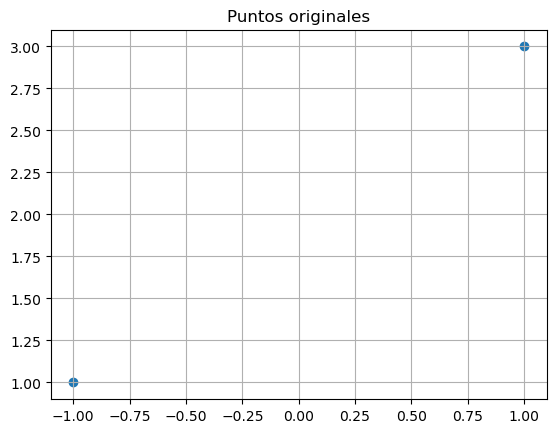

In [14]:
x_p=[-1,1]
y_p=[1,3]
plt.scatter(x_p,y_p)
plt.title('Puntos originales')
plt.grid(True)
plt.show()

Para obtener la función obtenemos las siguientes ecuaciones:
* $S(x_0)=y_0$
$a_0=1$

* $S(x_1)=y_1$
$b_0+2c_0+4d_0=1$

* $S'(x_0)=1$
$b_0=1$

* $S'(x_1)=2$
$4c_0+12d_0=1$

Obteniendo la siguiente función:

$1+1*(x+1)-\frac{1}{2}*(x+1)^2+\frac{1}{4}*(x+1)^3$

la solución graficada es la siguiente:

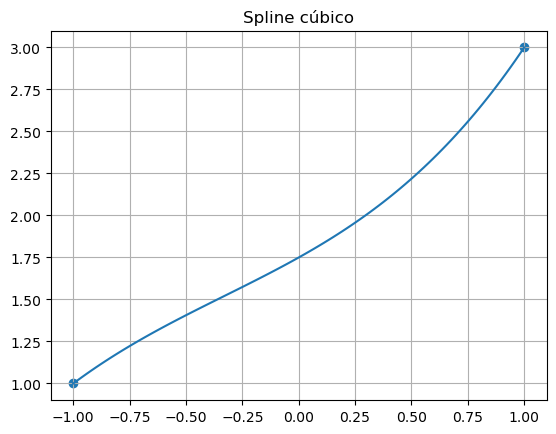

In [18]:
def s(x):
    return 1+ 1 * (x+1) -1/2 * (x+1)**2 +1/4 * (x+1)**3
plt.scatter(x_p,y_p)
plt.title('Spline cúbico')
plt.grid(True)
x_s=np.linspace(-1,1,100)
y_s=s(x_s)
plt.plot(x_s,y_s,label='spline ')
plt.show()

3. Diríjase al pseudocódigo del spline cúbico con frontera natural provisto en clase, en base a ese pseudocódigo complete la función.

A continuación se muestra la función completa

In [1]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between contiguous xs

    alpha = [0] * (n + 1)
    for i in range(1, n):
        alpha[i] = (
            3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])
        )

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    b = [0] * n
    d = [0] * n
    a = [ys[i] for i in range(n)]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        a_j = a[j]
        b_j = b[j]
        c_j = c[j]
        d_j = d[j]

        S_j = a_j + b_j * (x - xs[j]) + c_j * (x - xs[j])**2 + d_j * (x - xs[j])**3
        splines.append(S_j)

    splines.reverse()
    return splines





4. Usando la función anterior, encuentre el spline cúbico para:
xs=[1,2,3]

ys=[2,3,5]

In [4]:
xs = [1, 2, 3]
ys = [2, 3, 5]
splines = cubic_spline(xs, ys)
for i, spline in enumerate(splines):
    print(f"Spline {i}: ")
    display(spline)


Spline 0: 


0.75*x + 0.25*(x - 1)**3 + 1.25

Spline 1: 


1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2